## Importing Library

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 


sns.set_context("notebook", font_scale=1.2)
pd.set_option("display.max_columns" , None)
warnings.filterwarnings("ignore")
%matplotlib inline

## Load Data

In [19]:
df = pd.read_csv("Sample - Superstore.csv" , encoding='latin1')

## Initial Data Exploration

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [22]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [23]:
df.shape

(9994, 21)

## Checking Missing Values & Duplicates

In [25]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.drop_duplicates(inplace=True)

## Conver to Datetime

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


## Values Counts for Key Categorycal Features

In [33]:
for col in ['Category' , 'Region'] : 
     print( f"\n values count for {col}:")
     print( df[col].value_counts())


 values count for Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

 values count for Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

### Corelation Matrix

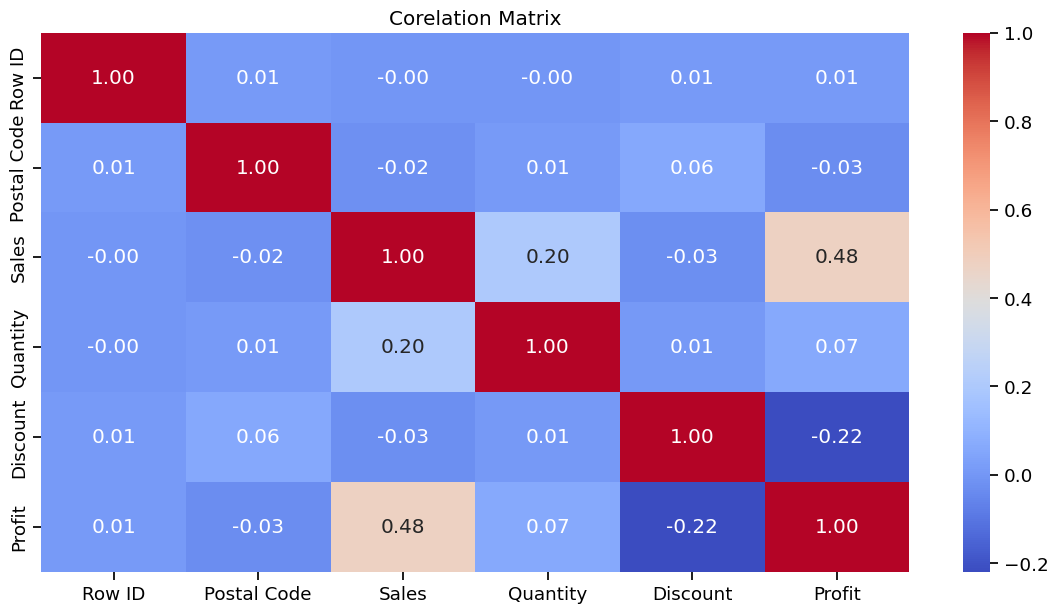

In [34]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm' , fmt=".2f")
plt.title("Corelation Matrix")
plt.show()

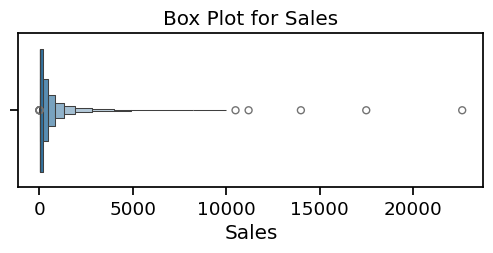

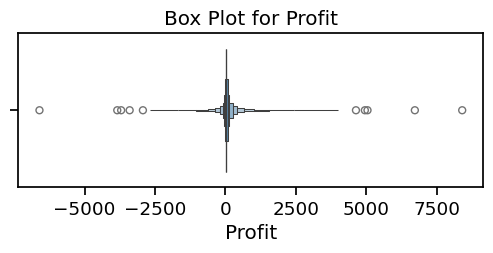

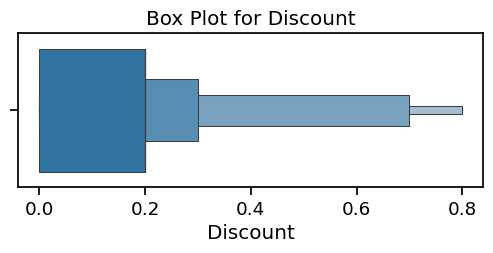

In [35]:
for col in ['Sales' , 'Profit' , 'Discount'] :
     plt.figure(figsize=(6,2))
     sns.boxenplot(x=df[col])
     plt.title(f"Box Plot for {col}")
     plt.show()

### Handle Outliers

In [36]:
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)

df_cleane = df[(df['Profit']>q_low)&(df['Profit']<q_high)]

## Feature Enginnering

In [37]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] =  df['Order Date'].dt.year
df['Orderm'] = df['Order Date'].dt.month

In [39]:
df['Discount Sales'] = df['Sales']*(1-df['Discount'])
df['Sales Per Quantity'] = df['Sales']/ df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date']- df['Order Date']).dt.days

## Monthly Sales Trend

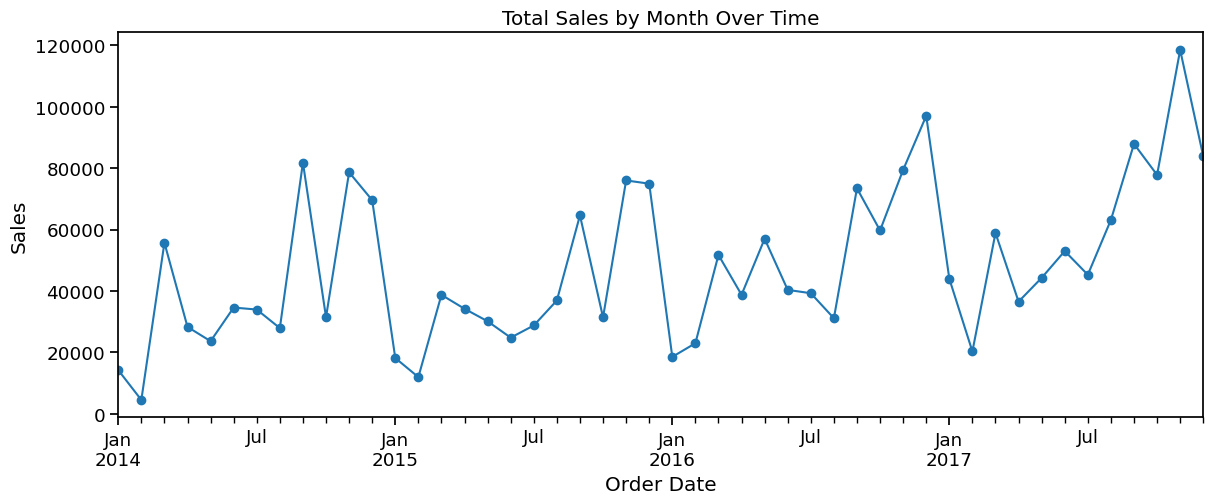

In [40]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker="o")
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

## Heatmap

### Monthly Sales Per Year